In [1]:
from scipy.optimize import curve_fit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_excel (r"C:\Users\Khaled Ahmed\Desktop\deflection_vs_temperature.xlsx")

In [7]:
data.sort_values (by = "d1")

,d1,temp_ac,d1_corr1,d1_corr2,d1_corr
17481,8,21.0,8,8,8
17533,13,27.0,11,11,11
19369,14,24.3,13,13,13
18466,15,24.0,14,14,14
18509,17,23.0,17,16,17
...,...,...,...,...,...
6450,1641,33.2,1370,1343,1357
3699,1683,45.0,1224,1185,1204
3217,1757,44.0,1292,1252,1272
3697,1860,45.0,1353,1310,1331


In [9]:
data1 = data.sort_values (by = "d1")

In [13]:
data1.reset_index (drop = True)

,d1,temp_ac,d1_corr1,d1_corr2,d1_corr
0,8,21.0,8,8,8
1,13,27.0,11,11,11
2,14,24.3,13,13,13
3,15,24.0,14,14,14
4,17,23.0,17,16,17
...,...,...,...,...,...
19966,1641,33.2,1370,1343,1357
19967,1683,45.0,1224,1185,1204
19968,1757,44.0,1292,1252,1272
19969,1860,45.0,1353,1310,1331


# D_cor1

In [21]:
# Assuming columns are named 'Temperature', 'Deflection', 'Corrected_Deflection'
T = data['temp_ac']
D = data['d1']
D_corrected = data['d1_corr1']

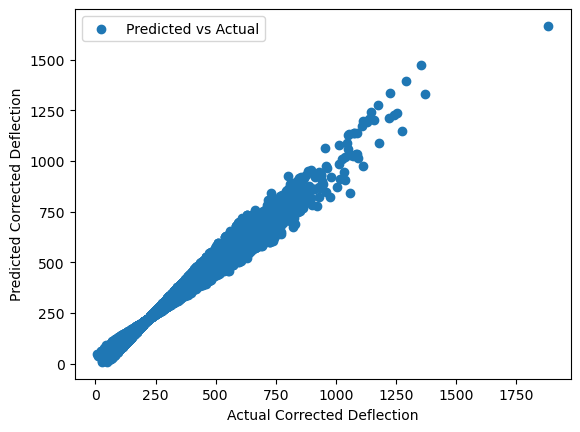

Equation: D_corrected = 0.8049860001035676 * D + -2.63575623259601 * T + 96.9534291699646


In [29]:
# Combine T and D into a single array
x_data = np.vstack((T, D))

# Define the model function with combined input
def model(x, a, b, c):
    T, D = x
    return a * D + b * T + c

# Fit the model
popt, pcov = curve_fit(model, x_data, D_corrected)

# Get the coefficients
a, b, c = popt

# Predict using the model
D_corrected_pred = model(x_data, a, b, c)

# Plot the actual vs predicted corrected deflections
plt.scatter(D_corrected, D_corrected_pred, label='Predicted vs Actual')
plt.xlabel('Actual Corrected Deflection')
plt.ylabel('Predicted Corrected Deflection')
plt.legend()
plt.show()

# Print the equation
print(f"Equation: D_corrected = {a} * D + {b} * T + {c}")


# D_cor2

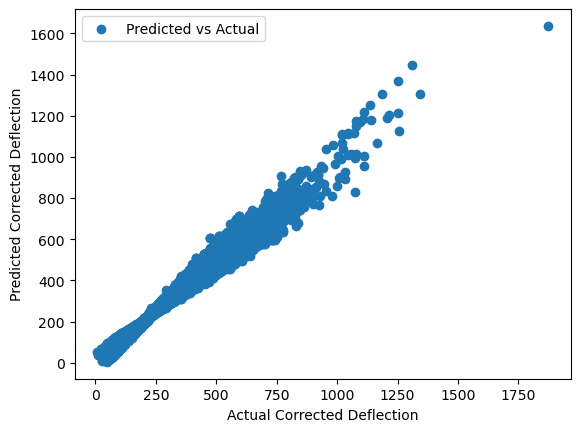

Equation: D_corrected = 0.7891335148790908 * D + -2.8257104732431224 * T + 103.98558987157358


In [34]:
# Assuming columns are named 'Temperature', 'Deflection', 'Corrected_Deflection'
T = data['temp_ac']
D = data['d1']
D_corrected = data['d1_corr2']
# Combine T and D into a single array
x_data = np.vstack((T, D))

# Define the model function with combined input
def model(x, a, b, c):
    T, D = x
    return a * D + b * T + c

# Fit the model
popt, pcov = curve_fit(model, x_data, D_corrected)

# Get the coefficients
a, b, c = popt

# Predict using the model
D_corrected_pred = model(x_data, a, b, c)

# Plot the actual vs predicted corrected deflections
plt.scatter(D_corrected, D_corrected_pred, label='Predicted vs Actual')
plt.xlabel('Actual Corrected Deflection')
plt.ylabel('Predicted Corrected Deflection')
plt.legend()
plt.show()

# Print the equation
print(f"Equation: D_corrected = {a} * D + {b} * T + {c}")

# Calculate alpha

In [36]:
# Assuming columns are named 'Temperature', 'Deflection', 'Corrected_Deflection'
T_measured = data['temp_ac']
D1_measured = data['d1']
D_corrected = data['d1_corr1']

# Reference temperature
T_reference = 20

# Define the model function
def model(T_measured, D1_measured, alpha):
    return D1_measured * np.exp(alpha * (T_reference - T_measured))

# Initial guess for alpha
initial_alpha = 0.01

# Fit the model to the data to find the best alpha
popt, pcov = curve_fit(lambda T_measured, alpha: model(T_measured, D1_measured, alpha), 
                       T_measured, D_corrected, p0=initial_alpha)

# Extract the optimized alpha
alpha_opt = popt[0]

print(f"Optimized alpha: {alpha_opt}")


Optimized alpha: 0.012684320270038772


In [38]:
# Assuming columns are named 'Temperature', 'Deflection', 'Corrected_Deflection'
T_measured = data['temp_ac']
D1_measured = data['d1']
D_corrected = data['d1_corr2']

# Reference temperature
T_reference = 20

# Define the model function
def model(T_measured, D1_measured, alpha):
    return D1_measured * np.exp(alpha * (T_reference - T_measured))

# Initial guess for alpha
initial_alpha = 0.01

# Fit the model to the data to find the best alpha
popt, pcov = curve_fit(lambda T_measured, alpha: model(T_measured, D1_measured, alpha), 
                       T_measured, D_corrected, p0=initial_alpha)

# Extract the optimized alpha
alpha_opt = popt[0]

print(f"Optimized alpha: {alpha_opt}")


Optimized alpha: 0.013906158942918453
